In [1]:
#!pip3 uninstall --yes torch torchaudio torchvision torchtext torchdata
#!pip3 install torch torchaudio torchvision torchtext torchdata

In [2]:
#!pip install -U portalocker>=2.0.0

**Step 2. Reproduce the results utilizing the "QMNIST" dataset**

In [3]:
# import the essential liraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [4]:
# Load QMNIST dataset and preprocess
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9704059/9704059 [00:00<00:00, 118029182.62it/s]

Extracting ./data/QMNIST/raw/qmnist-train-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 463024/463024 [00:00<00:00, 19937207.19it/s]

Extracting ./data/QMNIST/raw/qmnist-train-labels-idx2-int.gz to ./data/QMNIST/raw


100%|██████████| 9742279/9742279 [00:00<00:00, 131926787.84it/s]

Extracting ./data/QMNIST/raw/qmnist-test-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 526800/526800 [00:00<00:00, 20774149.80it/s]

Extracting ./data/QMNIST/raw/qmnist-test-labels-idx2-int.gz to ./data/QMNIST/raw


In [5]:
# display the label of QMINIST dataset
for batch_idx, (images, labels) in enumerate(train_loader):
    print("Labels:", labels)
    break

Labels: tensor([7, 6, 2, 0, 7, 8, 4, 8, 8, 8, 3, 6, 3, 0, 2, 6, 7, 0, 3, 3, 7, 8, 9, 3,
        1, 5, 9, 1, 7, 5, 0, 0, 8, 9, 9, 6, 5, 8, 4, 5, 7, 0, 5, 9, 7, 2, 5, 3,
        2, 7, 7, 6, 5, 8, 6, 3, 1, 7, 0, 7, 7, 9, 7, 5])


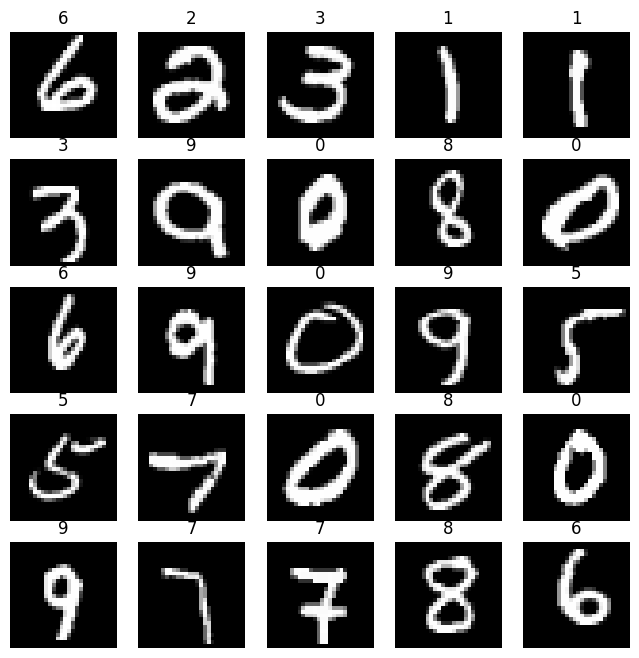

In [6]:
# define the label
labels_map = {
    0: 0,
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    5: 5,
    6: 6,
    7: 7,
    8: 8,
    9: 9,
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

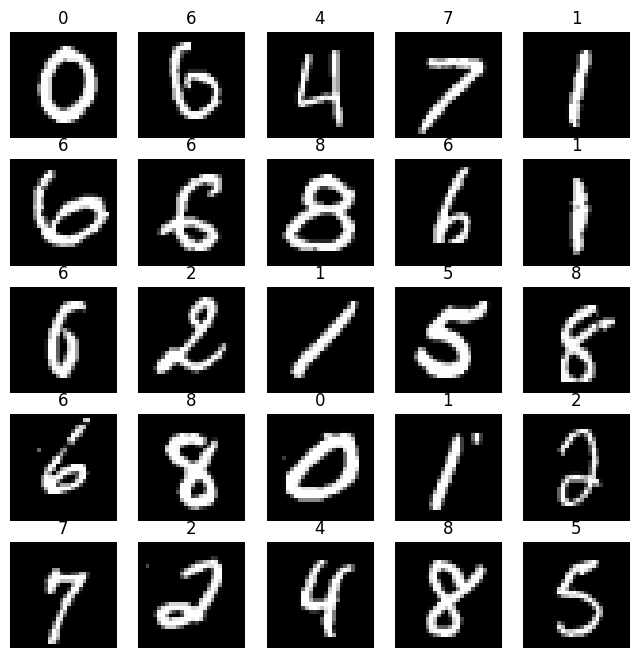

In [7]:
#Test DataSet
figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_dataset), size=(1,)).item()
    img, label = test_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [8]:
#Define the neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()

**Step 3. Report on the results in terms of prediction accuracy on the train and test datasets**

In [9]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Set the number of epoch
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
        #print(total_predictions, correct_predictions)
        epoch_accuracy = correct_predictions / total_predictions
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100},'
            f' Training Accuracy: {epoch_accuracy * 100:.2f}%')
            running_loss = 0.0
            correct_predictions = 0
            total_predictions = 0

    # Calculate training accuracy for the epoch
    epoch_accuracy = correct_predictions / total_predictions
    print(f'Training Accuracy for Epoch {epoch + 1}: {epoch_accuracy * 100:.2f}%')

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.0258068606257438, Training Accuracy: 69.91%
Epoch 1, Batch 200, Loss: 0.44607549846172334, Training Accuracy: 86.88%
Epoch 1, Batch 300, Loss: 0.37779620081186294, Training Accuracy: 88.38%
Epoch 1, Batch 400, Loss: 0.3396302895247936, Training Accuracy: 89.81%
Epoch 1, Batch 500, Loss: 0.3124812524020672, Training Accuracy: 90.36%
Epoch 1, Batch 600, Loss: 0.3143164472281933, Training Accuracy: 90.47%
Epoch 1, Batch 700, Loss: 0.2811606387794018, Training Accuracy: 91.33%
Epoch 1, Batch 800, Loss: 0.27741761453449726, Training Accuracy: 92.11%
Epoch 1, Batch 900, Loss: 0.2516379936784506, Training Accuracy: 92.80%
Training Accuracy for Epoch 1: 92.29%
Epoch 2, Batch 100, Loss: 0.21820720840245486, Training Accuracy: 93.58%
Epoch 2, Batch 200, Loss: 0.21446228966116906, Training Accuracy: 93.55%
Epoch 2, Batch 300, Loss: 0.20415533881634473, Training Accuracy: 93.84%
Epoch 2, Batch 400, Loss: 0.2017902683466673, Training Accuracy: 94.25%
Epoch 2, Batch 500, 

In [10]:
# Evaluate on the test model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total * 100}%')

Accuracy on test set: 96.36833333333334%


**Step 4. Proposed Modification**

Add another Dense layer of 128 nodes

In [11]:
# Define the new neural network architecture
class New_MLP(nn.Module):
    def __init__(self):
        super(New_MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the neural network
modified_model = New_MLP()

Hypothesize: Add another Dense layer of 128 nodes may increase the model performance.

The deeper the neural network, the more capable it is of capturing data patterns.

**Step 5. Modify the model based on the chosen method and train**

In [12]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modified_model.parameters(), lr=0.001)

# Set the number of epoch
num_epochs = 5
for epoch in range(num_epochs):
    modified_model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = modified_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
        #print(total_predictions, correct_predictions)
        epoch_accuracy = correct_predictions / total_predictions
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100},'
            f' Training Accuracy: {epoch_accuracy * 100:.2f}%')
            running_loss = 0.0
            correct_predictions = 0
            total_predictions = 0

    # Calculate training accuracy for the epoch
    epoch_accuracy = correct_predictions / total_predictions
    print(f'Training Accuracy for Epoch {epoch + 1}: {epoch_accuracy * 100:.2f}%')

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.1372631585597992, Training Accuracy: 65.02%
Epoch 1, Batch 200, Loss: 0.4451623521745205, Training Accuracy: 86.42%
Epoch 1, Batch 300, Loss: 0.3938507284224033, Training Accuracy: 87.91%
Epoch 1, Batch 400, Loss: 0.33840596698224545, Training Accuracy: 89.91%
Epoch 1, Batch 500, Loss: 0.32433912098407747, Training Accuracy: 90.00%
Epoch 1, Batch 600, Loss: 0.2956110941618681, Training Accuracy: 90.88%
Epoch 1, Batch 700, Loss: 0.2844810143113136, Training Accuracy: 91.05%
Epoch 1, Batch 800, Loss: 0.26362392265349627, Training Accuracy: 91.91%
Epoch 1, Batch 900, Loss: 0.24584551855921746, Training Accuracy: 92.48%
Training Accuracy for Epoch 1: 92.75%
Epoch 2, Batch 100, Loss: 0.21423631876707078, Training Accuracy: 93.27%
Epoch 2, Batch 200, Loss: 0.23860277414321898, Training Accuracy: 92.36%
Epoch 2, Batch 300, Loss: 0.2235447796434164, Training Accuracy: 93.14%
Epoch 2, Batch 400, Loss: 0.189650301001966, Training Accuracy: 93.92%
Epoch 2, Batch 500, L

**Step 6.Report on the results of the modified:**



In [ ]:
# define a function to get the model performance
def performance_report (num_epochs, criterion, optimizer, model):
    num_epochs = num_epochs
    optimizer = optimizer
    criterion = criterion
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)

        # Calculate training loss for the epoch
        epoch_loss = running_loss/ len(train_loader)
        # Calculate training accuracy for the epoch
        epoch_accuracy = correct_predictions / total_predictions
        print(f'Training Accuracy for Epoch {epoch + 1}: {epoch_accuracy * 100:.2f}%, Loss:{epoch_loss}')
    print('******Finished Training******')
    # Evaluate on the test model
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy on test set: { correct / total * 100}%')

In [14]:
# Evaluate on the test model
modified_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = modified_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total *100}%')

Accuracy on test set: 96.64833333333334%


After add another Dense layer of 128 nodes to the original neural network model,In this running round, the modified model's training accuracy slightly lower than the original neural network, while the testing accuracy slightly increases compared with the original one. However, the performance are not consistent across different runs. Sometimes even the testing accuracy of the modified model with one extra dense layer turns to be lower. This contradicts the hypothesis that adding one more dense layer would consistently increase accuracy.

**Step 7. A : Experiment with different optimizers**

In [15]:
optimizers = [optim.SGD(model.parameters(), lr=0.01, momentum=0.9),
              optim.RMSprop(model.parameters(), lr=0.001, alpha=0.9),
              optim.Adagrad(model.parameters(), lr=0.01),
              optim.Adadelta(model.parameters(), lr=1.0, rho=0.9)]
criterions = [nn.CrossEntropyLoss(), nn.HingeEmbeddingLoss(), nn.TripletMarginLoss()]
# choose SGD as optimizer
model_1 = New_MLP()
print(f'optimizer : SGD')
# get the performance on training and testing data
performance_report (5, nn.CrossEntropyLoss(), optim.SGD(model_1.parameters(), lr=0.01, momentum=0.9,), model_1)

optimizer : SGD
Training Accuracy for Epoch 1: 83.46%, Loss:0.520638111946997
Training Accuracy for Epoch 2: 94.31%, Loss:0.18473494790200548
Training Accuracy for Epoch 3: 95.87%, Loss:0.13443830996644554
Training Accuracy for Epoch 4: 96.59%, Loss:0.10683616037780383
Training Accuracy for Epoch 5: 97.28%, Loss:0.08800512236376196
******Finished Training******
Accuracy on test set: 96.34166666666667%


In [16]:
# choose RMSprop as optimizer
model_2 = New_MLP()
print(f'optimizer : RMSprop')
# get the performance on training and testing data
performance_report (5, nn.CrossEntropyLoss(),  optim.RMSprop(model_2.parameters(), lr=0.001, alpha=0.9), model_2)

optimizer : RMSprop
Training Accuracy for Epoch 1: 86.11%, Loss:0.43897915084256545
Training Accuracy for Epoch 2: 94.36%, Loss:0.18205247336883407
Training Accuracy for Epoch 3: 95.69%, Loss:0.13595203113462181
Training Accuracy for Epoch 4: 96.62%, Loss:0.11146156460509452
Training Accuracy for Epoch 5: 97.00%, Loss:0.09707146646742369
******Finished Training******
Accuracy on test set: 95.31833333333334%


In [17]:
# choose Adagrad as optimizer
model_3 = New_MLP()
# get the performance on training and testing data
print(f'optimizer : Adagrad')
performance_report (5, nn.CrossEntropyLoss(),  optim.Adagrad(model_3.parameters(), lr=0.01), model_3)

optimizer : Adagrad
Training Accuracy for Epoch 1: 87.25%, Loss:0.4014728425312906
Training Accuracy for Epoch 2: 93.88%, Loss:0.20341310365351914
Training Accuracy for Epoch 3: 94.99%, Loss:0.1632936385644874
Training Accuracy for Epoch 4: 95.65%, Loss:0.1416586424881366
Training Accuracy for Epoch 5: 96.20%, Loss:0.12653075735261446
******Finished Training******
Accuracy on test set: 95.65166666666667%


In [18]:
# choose Adagrad Adadelta as optimizer
model_4 = New_MLP()
# get the performance on training and testing data
print(f'optimizer : Adadelta')
performance_report (5, nn.CrossEntropyLoss(), optim.Adadelta(model_4.parameters(), lr=1.0, rho=0.9), model_4)


optimizer : Adadelta
Training Accuracy for Epoch 1: 86.17%, Loss:0.4284219213330479
Training Accuracy for Epoch 2: 94.70%, Loss:0.17335230706464141
Training Accuracy for Epoch 3: 96.09%, Loss:0.13018429431536083
Training Accuracy for Epoch 4: 96.67%, Loss:0.11005890466370133
Training Accuracy for Epoch 5: 97.11%, Loss:0.09695652729659371
******Finished Training******
Accuracy on test set: 95.54%


Different optimizers result in varying accuracies, with all optimizers achieving good accuracy, over 95%. Among them, SGD achieves the highest accuracy 96.34%, except for Adam 96.64%.

**Step 7. B : Experiment with different loss functions**

In [19]:
# Define the new neural network architecture with activation function in the output layer
class New_MLP_2(nn.Module):
    def __init__(self):
        super(New_MLP_2, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.softmax(self.fc4(x), dim=1)
        return x

In [20]:
# creat a model with softmax function in the output layer
model_a = New_MLP_2()
# use NLLLoss as the loss function, which is applied only on models with the softmax function
# get the performance on training and testing data
print(f'Model performance with NLLLoss as loss function')
performance_report (5, nn.NLLLoss(), optim.Adam(model_a.parameters(), lr=0.001), model_a)

Model performance with NLLLoss as loss function
Training Accuracy for Epoch 1: 56.45%, Loss:-0.5576068422735245
Training Accuracy for Epoch 2: 87.54%, Loss:-0.8709477139815592
Training Accuracy for Epoch 3: 91.90%, Loss:-0.9170378806875713
Training Accuracy for Epoch 4: 92.97%, Loss:-0.9281511510740211
Training Accuracy for Epoch 5: 93.77%, Loss:-0.9362846230393025
******Finished Training******
Accuracy on test set: 94.69999999999999%


In [41]:
model_b = New_MLP()
print(f'Model performance with MSE Loss as loss function')
#performance_report (5, nn.MSELoss(), optim.Adam(model_b.parameters(), lr=0.001), model_b)
num_epochs = 5
optimizer = optim.Adam(model_b.parameters(), lr=0.001)
criterion = nn.MSELoss()
for epoch in range(num_epochs):
    model_b.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_b(inputs)
        # encode the label to match output requirement
        labels_onehot = torch.zeros_like(outputs)
        labels_onehot.scatter_(1, labels.view(-1, 1), 1.0)
        loss = criterion(outputs, labels_onehot)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)

    # Calculate training loss for the epoch
    epoch_loss = running_loss/ len(train_loader)
    # Calculate training accuracy for the epoch
    epoch_accuracy = correct_predictions / total_predictions
    print(f'Training Accuracy for Epoch {epoch + 1}: {epoch_accuracy * 100:.2f}%, Loss:{epoch_loss}')
print('******Finished Training******')

# Evaluate on the test model
model_b.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model_b(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy on test set: { correct / total * 100}%')

Model performance with MSE Loss as loss function
Training Accuracy for Epoch 1: 89.68%, Loss:0.01925570779774926
Training Accuracy for Epoch 2: 95.67%, Loss:0.008413092900456777
Training Accuracy for Epoch 3: 96.65%, Loss:0.006637804284527985
Training Accuracy for Epoch 4: 97.19%, Loss:0.005512569947337021
Training Accuracy for Epoch 5: 97.41%, Loss:0.004953415283852859
******Finished Training******
Accuracy on test set: 96.56%


Two additional loss functions were tested here: NLLLoss achieved an accuracy of 94.7%, while MSELoss achieved an accuracy of 96.56%. Although MSELoss demonstrates competitive accuracy compared to CrossEntropy, which achieved an accuracy of 96.64%, MSELoss requires converting the output to one-hot encoding for compatibility. This extra process may introduce some error, so for multi-class classification tasks like image classification, CrossEntropy is considered as a better choice."

**Step 7. C : Experiment with dropout**

In [22]:
# Construct the neural network model with dropout for each layer
class MLP_Dropout(nn.Module):
    def __init__(self, dropout_prob=0.5):
        super(MLP_Dropout, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(128, 128)
        self.dropout2 = nn.Dropout(dropout_prob)
        self.fc3 = nn.Linear(128, 64)
        self.dropout3 = nn.Dropout(dropout_prob)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = torch.softmax(self.fc4(x), dim=1)
        return x

In [23]:
model_i = MLP_Dropout()
# get the performance on training and testing data
print('Mode Performance with dropout probability = 0.5')
performance_report (5, nn.CrossEntropyLoss(), optim.Adam(model_i.parameters(), lr=0.001), model_i)

Mode Performance with dropout probability = 0.5
Training Accuracy for Epoch 1: 62.90%, Loss:1.8365322342559474
Training Accuracy for Epoch 2: 81.37%, Loss:1.6510601170789967
Training Accuracy for Epoch 3: 83.23%, Loss:1.6303291144147356
Training Accuracy for Epoch 4: 83.53%, Loss:1.6262702858015927
Training Accuracy for Epoch 5: 83.74%, Loss:1.624494870207203
******Finished Training******
Accuracy on test set: 89.88000000000001%


In [24]:
model_j = MLP_Dropout(0.7)
# get the performance on training and testing data
print('Mode Performance with dropout probability = 0.7')
performance_report (5, nn.CrossEntropyLoss(), optim.Adam(model_j.parameters(), lr=0.001), model_j)

Mode Performance with dropout probability = 0.7
Training Accuracy for Epoch 1: 35.79%, Loss:2.095614153311959
Training Accuracy for Epoch 2: 52.20%, Loss:1.9442043412468835
Training Accuracy for Epoch 3: 53.82%, Loss:1.9241228389587484
Training Accuracy for Epoch 4: 55.30%, Loss:1.9094482094748442
Training Accuracy for Epoch 5: 57.10%, Loss:1.8914797341645653
******Finished Training******
Accuracy on test set: 79.58666666666666%


In [25]:
model_k = MLP_Dropout(0.2)
# get the performance on training and testing data
print('Mode Performance with dropout probability = 0.2')
performance_report (5, nn.CrossEntropyLoss(), optim.Adam(model_k.parameters(), lr=0.001), model_k)

Mode Performance with dropout probability = 0.2
Training Accuracy for Epoch 1: 79.36%, Loss:1.674515878976281
Training Accuracy for Epoch 2: 89.42%, Loss:1.5683263293715681
Training Accuracy for Epoch 3: 90.76%, Loss:1.5548098616000177
Training Accuracy for Epoch 4: 91.56%, Loss:1.5461109896966898
Training Accuracy for Epoch 5: 92.08%, Loss:1.5405183382379983
******Finished Training******
Accuracy on test set: 93.425%


After trying dropout with different probabilities (p = 0.2, 0.5, 0.7), we observed that the higher the dropout probability, the lower the model's performance. This is because dropout randomly disconnects nodes, which is typically considered an effective method to prevent overfitting. Dropout probabilities in the range of 0.2 to 0.5 are reasonable choices, as too high a probability may hinder the model's ability to capture data patterns.

**Step 7. D : Experiment with activation functions**



In [26]:
# creat a model with softmax function in the output layer
model_x = New_MLP_2()
# get the performance on training and testing data
print(f'Model performance with softmax as output activation function')
performance_report (5, nn.CrossEntropyLoss(), optim.Adam(model_x.parameters(), lr=0.001), model_x)

Model performance with softmax as output activation function
Training Accuracy for Epoch 1: 81.28%, Loss:1.656397135654238
Training Accuracy for Epoch 2: 91.15%, Loss:1.5515638579691906
Training Accuracy for Epoch 3: 93.04%, Loss:1.5319968642456445
Training Accuracy for Epoch 4: 94.07%, Loss:1.5211110062944864
Training Accuracy for Epoch 5: 94.48%, Loss:1.5163493076367165
******Finished Training******
Accuracy on test set: 93.90166666666667%


In [27]:
# Define the new neural network architecture using sigmoid function as activation function
class MLP_Sigmoid(nn.Module):
    def __init__(self):
        super(MLP_Sigmoid, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        x = torch.softmax(self.fc4(x), dim=1)
        return x

In [28]:
model_y = MLP_Sigmoid()
# get the performance on training and testing data
print(f'Model Performance using Sigmoid function')
performance_report (5, nn.CrossEntropyLoss(), optim.Adam(model_y.parameters(), lr=0.001), model_y)

Model Performance using Sigmoid function
Training Accuracy for Epoch 1: 58.70%, Loss:1.89215990462537
Training Accuracy for Epoch 2: 80.98%, Loss:1.6571321708561262
Training Accuracy for Epoch 3: 87.45%, Loss:1.5929276236593088
Training Accuracy for Epoch 4: 93.50%, Loss:1.5315370643570987
Training Accuracy for Epoch 5: 94.44%, Loss:1.5198045941049865
******Finished Training******
Accuracy on test set: 94.78999999999999%


In [35]:
# Define the new neural network architecture using Tanh function as activation function
class MLP_Tanh(nn.Module):
    def __init__(self):
        super(MLP_Tanh, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = torch.softmax(self.fc4(x), dim=1)
        return x

In [36]:
model_z = MLP_Tanh()
print(f'Model Performance using Tanh function')
# get the performance on training and testing data
performance_report (5, nn.CrossEntropyLoss(), optim.Adam(model_z.parameters(), lr=0.001), model_z)

Model Performance using Tanh function
Training Accuracy for Epoch 1: 86.84%, Loss:1.6108595431486428
Training Accuracy for Epoch 2: 92.56%, Loss:1.538499570350403
Training Accuracy for Epoch 3: 93.40%, Loss:1.5294960021718478
Training Accuracy for Epoch 4: 93.71%, Loss:1.5260095880992377
Training Accuracy for Epoch 5: 93.99%, Loss:1.5224146573528299
******Finished Training******
Accuracy on test set: 93.27166666666666%


In [42]:
class MLP_LeakyReLU(nn.Module):
    def __init__(self):
        super(MLP_LeakyReLU, self).__init__()

        # Define the hidden layer with LeakyReLU activation
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        self.leaky_relu = nn.LeakyReLU()


    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input tensor
        x = self.leaky_relu(self.fc1(x))
        x = self.leaky_relu(self.fc2(x))
        x = self.leaky_relu(self.fc3(x))
        x = torch.softmax(self.fc4(x), dim=1)
        return x

In [43]:
model_w = MLP_LeakyReLU()
# get the performance on training and testing data
performance_report (5, nn.CrossEntropyLoss(), optim.Adam(model_w.parameters(), lr=0.001), model_w)

Training Accuracy for Epoch 1: 83.87%, Loss:1.6302799784552569
Training Accuracy for Epoch 2: 91.99%, Loss:1.5427697408936425
Training Accuracy for Epoch 3: 93.57%, Loss:1.5265046109014482
Training Accuracy for Epoch 4: 94.21%, Loss:1.51905291192313
Training Accuracy for Epoch 5: 94.40%, Loss:1.5170507230229977
******Finished Training******
Accuracy on test set: 94.30333333333333%


After training with different activation functions, the results are as follows: the model with softmax in the output layer achieved an accuracy of 93.27%. Among the activation functions tanh, sigmoid, relu, and leaky relu, the model with sigmoid as the hidden layer activation function and softmax as the output layer function achieved the highest accuracy at 94.78%. However, the model without softmax still outperforms the others with an accuracy of 96.64%.

**Step 8. Show an example of a backpropagation algorithm by hand**

The pdf file has been uploaded in the canvas

**GITHUB:** https://github.com/sarahsha2023/Deep_Learning_DATA255
